In [81]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Creating generator
train_ds = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [74]:
#Creating model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),strides = 2,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),strides = 2,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation = 'sigmoid'))

In [75]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [76]:
es = EarlyStopping(monitor = 'val_accuracy',mode = 'max',verbose = 1,patience = 3)

In [77]:
history = model.fit(train_ds,epochs = 20,validation_data = val_ds,callbacks = [es])

Epoch 1/20
625/625 [==============================] - 51s 76ms/step - loss: 0.6469 - accuracy: 0.6568 - val_loss: 0.6763 - val_accuracy: 0.6306
Epoch 2/20
625/625 [==============================] - 48s 76ms/step - loss: 0.5120 - accuracy: 0.7456 - val_loss: 0.6910 - val_accuracy: 0.7144
Epoch 3/20
625/625 [==============================] - 47s 74ms/step - loss: 0.4379 - accuracy: 0.7953 - val_loss: 0.5799 - val_accuracy: 0.7410
Epoch 4/20
625/625 [==============================] - 49s 78ms/step - loss: 0.3768 - accuracy: 0.8284 - val_loss: 0.4895 - val_accuracy: 0.7586
Epoch 5/20
625/625 [==============================] - 46s 73ms/step - loss: 0.3192 - accuracy: 0.8602 - val_loss: 0.4992 - val_accuracy: 0.7894
Epoch 6/20
625/625 [==============================] - 48s 76ms/step - loss: 0.2507 - accuracy: 0.8953 - val_loss: 0.5644 - val_accuracy: 0.7898
Epoch 7/20
625/625 [==============================] - 46s 72ms/step - loss: 0.2013 - accuracy: 0.9160 - val_loss: 0.6247 - val_accuracy:

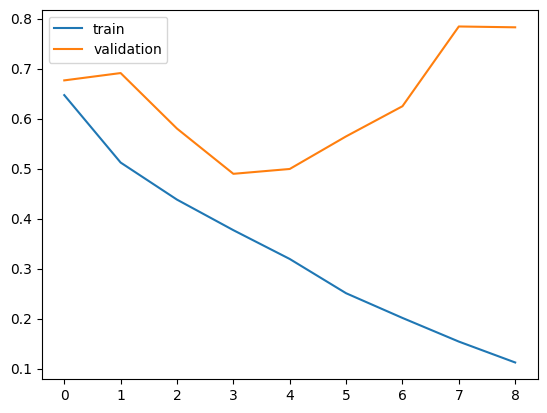

In [78]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'validation')
plt.legend()

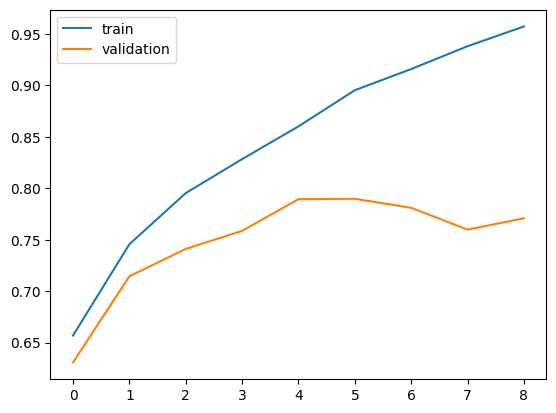

In [79]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'validation')
plt.legend()